## Import Dataset

In [2]:
from teaspoon.ML import load_datasets
import numpy as np
import pandas as pd
mnist = load_datasets.mnist()
mnist

,zero_dim_rtl,zero_dim_ltr,zero_dim_btt,zero_dim_ttb,one_dim_rtl,one_dim_ltr,one_dim_btt,one_dim_ttb,labels
0,"[[23.0, 50.0], [13.0, 20.0]]","[[24.0, 50.0], [11.0, 21.0]]","[[24.0, 50.0], [8.0, 9.0]]","[[23.0, 50.0]]",[],[],[],[],5
1,"[[22.0, 50.0]]","[[22.0, 50.0]]","[[23.0, 50.0]]","[[24.0, 50.0]]","[[0.0, 8.0]]","[[0.0, 8.0]]","[[0.0, 9.0]]","[[0.0, 8.0]]",0
2,"[[22.0, 50.0]]","[[25.0, 50.0]]","[[24.0, 50.0], [15.0, 16.0]]","[[23.0, 50.0], [13.0, 22.0]]",[],[],[],[],4
3,"[[21.0, 50.0]]","[[20.0, 50.0]]","[[24.0, 50.0]]","[[23.0, 50.0]]",[],[],[],[],1
4,"[[20.0, 50.0], [16.0, 18.0]]","[[22.0, 50.0], [14.0, 15.0]]","[[26.0, 50.0]]","[[21.0, 50.0]]","[[0.0, 9.0]]","[[0.0, 12.0]]","[[0.0, 9.0]]","[[0.0, 14.0]]",9
...,...,...,...,...,...,...,...,...,...
59995,"[[23.0, 50.0], [16.0, 17.0]]","[[22.0, 50.0], [16.0, 18.0]]","[[24.0, 50.0]]","[[23.0, 50.0]]","[[0.0, 13.0], [0.0, 7.0]]","[[0.0, 13.0], [0.0, 9.0]]","[[0.0, 16.0], [0.0, 6.0]]","[[0.0, 17.0], [0.0, 5.0]]",8
59996,"[[21.0, 50.0], [17.0, 18.0]]","[[24.0, 50.0], [12.0, 18.0], [9.0, 17.0]]","[[23.0, 50.0]]","[[24.0, 50.0], [7.0, 10.0]]",[],[],[],[],3
59997,"[[24.0, 50.0], [13.0, 18.0]]","[[23.0, 50.0], [12.0, 20.0]]","[[24.0, 50.0]]","[[23.0, 50.0], [5.0, 7.0]]",[],[],[],[],5
59998,"[[23.0, 50.0], [8.0, 21.0]]","[[22.0, 50.0], [11.0, 15.0]]","[[21.0, 50.0]]","[[26.0, 50.0], [8.0, 15.0]]","[[0.0, 17.0]]","[[0.0, 8.0]]","[[0.0, 15.0]]","[[0.0, 10.0]]",6


### Fill Missing Data in One Dimension

In [2]:
def fill_missing(dim_1):
    for i in range(0, len(dim_1)):
        if len(dim_1[i])== 0:
            dim_1[i] = np.array([[0,.01]])
        else: 
            dim_1[i] = dim_1[i]
    return dim_1

In [3]:
import warnings
warnings.filterwarnings('ignore')
mnist['one_dim_rtl'] = fill_missing(mnist['one_dim_rtl'])
mnist['one_dim_ltr'] = fill_missing(mnist['one_dim_ltr'])
mnist['one_dim_btt'] = fill_missing(mnist['one_dim_btt'])
mnist['one_dim_ttb'] = fill_missing(mnist['one_dim_ttb'])

### Choose Dimension for Timing Test

In [3]:
def train_test_split_sklearn(DgmsFD, labels_col, train_size=.5, seed=12):
    from sklearn.model_selection import train_test_split
    labels = DgmsFD[labels_col]
    training_dgms, testing_dgms = train_test_split(DgmsFD, train_size=train_size, random_state=seed, stratify=labels)
    return training_dgms.reset_index(), testing_dgms.reset_index()

In [4]:
dgms_train, dgms_test = train_test_split_sklearn(mnist, 'labels', train_size = .95)
xdgm0_train = dgms_train['zero_dim_rtl']
xdgm0_test = dgms_test['zero_dim_rtl']
xdgm1_train = dgms_train['one_dim_rtl']
xdgm1_test = dgms_test['one_dim_rtl']
labels_train = dgms_train['labels']
labels_test = dgms_test['labels']

### Load original kernel method function from teaspoon

In [5]:
import numpy as np
import math
from numpy.linalg import norm as lnorm
from math import pi

def KernelMethod(perDgm1, perDgm2, sigma):
    
    L1 = len(perDgm1)
    L2 = len(perDgm2)
    kernel = np.zeros((L2, L1))

    Kernel = 0

    for i in range(0, L1):
        p = perDgm1[i]
        p = np.reshape(p, (2, 1))
        for j in range(0, L2):
            q = perDgm2[j]
            q = np.reshape(q, (2, 1))
            q_bar = np.zeros((2, 1))
            q_bar[0] = q[1]
            q_bar[1] = q[0]
            dist1 = lnorm(p-q)
            dist2 = lnorm(p-q_bar)
            kernel[j, i] = np.exp(-(math.pow(dist1, 2))/(8*sigma)) - \
                np.exp(-(math.pow(dist2, 2))/(8*sigma))
            Kernel = Kernel+kernel[j, i]
    Kernel = Kernel*(1/(8*pi*sigma))

    return Kernel

def heat_kernel_distance(dgm0, dgm1, sigma=.4):
    return np.sqrt(KernelMethod(dgm0, dgm0, sigma) + KernelMethod(dgm1, dgm1, sigma) - 2*KernelMethod(dgm0, dgm1, sigma))

def kernel_features(train, s):
    import time
    import numpy as np
    n_train = len(train)
    X_train_features = np.zeros((n_train, n_train))

    for i in range(0,n_train):
        for j in range(0,i):
            dgm0 = train[i]
            dgm1 = train[j]
            hka = heat_kernel_distance(dgm0, dgm1, sigma = s) 
            X_train_features[i,j] = hka
            X_train_features[j,i] = hka

    return X_train_features

Optimized with Numba

In [6]:
import numpy as np
import math
from numpy.linalg import norm as lnorm
from math import pi
from numba import jit
import time

@jit(nopython=True)
def optimizedKernelMethod(perDgm1, perDgm2, sigma):
    L1 = len(perDgm1)
    L2 = len(perDgm2)
    kernel = np.zeros((L2, L1))

    Kernel = 0

    for i in range(0, L1):
        p = perDgm1[i]
        p = np.reshape(p, (2, 1))
        for j in range(0, L2):
            q = perDgm2[j]
            q = np.reshape(q, (2, 1))
            q_bar = np.zeros((2, 1))
            q_bar[0] = q[1]
            q_bar[1] = q[0]
            dist1 = lnorm(p-q)
            dist2 = lnorm(p-q_bar)
            kernel[j, i] = np.exp(-(np.power(dist1, 2))/(8*sigma)) - \
                np.exp(-(np.power(dist2, 2))/(8*sigma))
            Kernel = Kernel+kernel[j, i]
    Kernel = Kernel*(1/(8*pi*sigma))

    return Kernel

@jit(nopython=True)
def optimized_heat_kernel_distance(dgm0, dgm1, sigma=.4):
    return np.sqrt(optimizedKernelMethod(dgm0, dgm0, sigma) + optimizedKernelMethod(dgm1, dgm1, sigma) - 2*optimizedKernelMethod(dgm0, dgm1, sigma))

@jit(nopython=True, parallel=True)
def parallel_optimized_kernel_features(train, num_dgms, s):
    X_train_features = np.zeros((num_dgms, num_dgms))
    
    for i in range(0,num_dgms):
        for j in range(0,i):
            dgm0 = train[train[:,0]==i,1:3]
            dgm1 = train[train[:,0]==j,1:3]
            hka = optimized_heat_kernel_distance(dgm0, dgm1, sigma = s) 
            X_train_features[i,j] = hka
            X_train_features[j,i] = hka

    return X_train_features

@jit(nopython=True)
def optimized_kernel_features(train, num_dgms, s):
    X_train_features = np.zeros((num_dgms, num_dgms))
    
    for i in range(0,num_dgms):
        for j in range(0,i):
            dgm0 = train[train[:,0]==i,1:3]
            dgm1 = train[train[:,0]==j,1:3]
            hka = optimized_heat_kernel_distance(dgm0, dgm1, sigma = s) 
            X_train_features[i,j] = hka
            X_train_features[j,i] = hka

    return X_train_features

Parallel with guvectorize

In [7]:
from numba import guvectorize
@guvectorize(["void(float64[:,:], float64[:], float64, float64[:,:])",],"(m,n),(p),()->(p,p)", target='parallel')
def parallel_gu_vectorize(train, num_dgms, s, result):
    n_train = len(num_dgms)
    for i in range(n_train):
        for j in range(i):
            dgm0 = train[train[:,0]==i,1:3]
            dgm1 = train[train[:,0]==j,1:3]
            kSigma0 = 0
            kSigma1 = 0
            kSigma2 = 0
            sigma = s
            for k in range(dgm0.shape[0]):
                p = dgm0[k,0:2]
                for l in range(dgm0.shape[0]):
                    q = dgm0[l,0:2]
                    qc = dgm0[l, 1::-1]
                    pq = (p[0] - q[0])**2 + (p[1] - q[1])**2
                    pqc = (p[0] - qc[0])**2 + (p[1] - qc[1])**2
                    kSigma0 += math.exp(-( pq) / (8 * sigma)) - math.exp(-(pqc) / (8 * sigma))
            for k in range(dgm1.shape[0]):
                p = dgm1[k,0:2]
                for l in range(dgm1.shape[0]):
                    q = dgm1[l,0:2]
                    qc = dgm1[l, 1::-1]
                    pq = (p[0] - q[0])**2 + (p[1] - q[1])**2
                    pqc = (p[0] - qc[0])**2 + (p[1] - qc[1])**2
                    kSigma1 += math.exp(-( pq) / (8 * sigma)) - math.exp(-(pqc) / (8 * sigma))
            for k in range(dgm0.shape[0]):
                p = dgm0[k,0:2]
                for l in range(dgm1.shape[0]):
                    q = dgm1[l,0:2]
                    qc = dgm1[l, 1::-1]
                    pq = (p[0] - q[0])**2 + (p[1] - q[1])**2
                    pqc = (p[0] - qc[0])**2 + (p[1] - qc[1])**2
                    kSigma2 += math.exp(-( pq) / (8 * sigma)) - math.exp(-(pqc) / (8 * sigma))

            kSigma0 = kSigma0/(8 * np.pi * sigma)
            kSigma1 = kSigma1/(8 * np.pi * sigma)
            kSigma2 = kSigma2/(8 * np.pi * sigma)
            result[i,j] = math.sqrt(kSigma1 + kSigma0-2*kSigma2)
            result[j,i] = math.sqrt(kSigma1 + kSigma0-2*kSigma2)

In [8]:
from numba import guvectorize
@guvectorize(["void(float64[:,:], float64[:], float64, float64[:,:])",],"(m,n),(p),()->(p,p)", target='cpu')
def guvectorize_kernel(train, num_dgms, s, result):
    n_train = len(num_dgms)
    for i in range(n_train):
        for j in range(i):
            dgm0 = train[train[:,0]==i,1:3]
            dgm1 = train[train[:,0]==j,1:3]
            kSigma0 = 0
            kSigma1 = 0
            kSigma2 = 0
            sigma = s
            for k in range(dgm0.shape[0]):
                p = dgm0[k,0:2]
                for l in range(dgm0.shape[0]):
                    q = dgm0[l,0:2]
                    qc = dgm0[l, 1::-1]
                    pq = (p[0] - q[0])**2 + (p[1] - q[1])**2
                    pqc = (p[0] - qc[0])**2 + (p[1] - qc[1])**2
                    kSigma0 += math.exp(-( pq) / (8 * sigma)) - math.exp(-(pqc) / (8 * sigma))
            for k in range(dgm1.shape[0]):
                p = dgm1[k,0:2]
                for l in range(dgm1.shape[0]):
                    q = dgm1[l,0:2]
                    qc = dgm1[l, 1::-1]
                    pq = (p[0] - q[0])**2 + (p[1] - q[1])**2
                    pqc = (p[0] - qc[0])**2 + (p[1] - qc[1])**2
                    kSigma1 += math.exp(-( pq) / (8 * sigma)) - math.exp(-(pqc) / (8 * sigma))
            for k in range(dgm0.shape[0]):
                p = dgm0[k,0:2]
                for l in range(dgm1.shape[0]):
                    q = dgm1[l,0:2]
                    qc = dgm1[l, 1::-1]
                    pq = (p[0] - q[0])**2 + (p[1] - q[1])**2
                    pqc = (p[0] - qc[0])**2 + (p[1] - qc[1])**2
                    kSigma2 += math.exp(-( pq) / (8 * sigma)) - math.exp(-(pqc) / (8 * sigma))

            kSigma0 = kSigma0/(8 * np.pi * sigma)
            kSigma1 = kSigma1/(8 * np.pi * sigma)
            kSigma2 = kSigma2/(8 * np.pi * sigma)
            result[i,j] = math.sqrt(kSigma1 + kSigma0-2*kSigma2)
            result[j,i] = math.sqrt(kSigma1 + kSigma0-2*kSigma2)

In [9]:
@jit
def reshape_persistence_diagrams(dgm):
    dgm_reshape = np.array([])
    num_dgms = len(dgm)
    for i in range(0,num_dgms):
        t = np.repeat(i, len(dgm[i]))
        t = t.reshape(len(dgm[i]),1)
        t1 = np.concatenate((t,dgm[i]),1)
        if i == 0:
            dgm_reshape = t1
        else:
            dgm_reshape = np.append(dgm_reshape, t1, 0)
    dummy = np.zeros((num_dgms))
    return dgm_reshape, num_dgms, dummy

/var/folders/p6/pn26dbmx4jj67d6nh7m6557h0000gn/T/ipykernel_52229/1173746959.py:2: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def reshape_persistence_diagrams(dgm):


First run to compile

In [11]:
dgms_train, dgms_test = train_test_split_sklearn(mnist, 'labels', train_size = 10, seed=1)
train_test = np.array(dgms_train['zero_dim_rtl'])
X_train_features_original = kernel_features(np.array(train_test), s = .3)
train, dummy_train, dummy = reshape_persistence_diagrams(train_test)
X_train_features_optimized = optimized_kernel_features(train, dummy_train, s = .3)
X_train_features_optimized_parallel = parallel_optimized_kernel_features(train, dummy_train, .3)
X_train_features_gu_parallel = parallel_gu_vectorize(train, dummy, .3)
X_train_features_gu = guvectorize_kernel(train, dummy, .3)



### Loop for random samples and timing

In [16]:
seed = [0,1,2,3,4]
train_size = [.001, .0025, .005, .0075, .01, .0125, .015, .02, .05, .1]
n = len(train_size)
timing = np.zeros((n,4))
for i in range(0,n):
    for j in seed:
        dgms_train, dgms_test = train_test_split_sklearn(mnist, 'labels', train_size = train_size[i], seed=j)
        xdgm0_train = np.array(dgms_train['zero_dim_rtl'])
        timing[i,0] += len(xdgm0_train)

        start = time.time()
        X_train_features = kernel_features(xdgm0_train, s = .3)
        end = time.time()-start
        timing[i,1] +=end
        print("Finished Kernel")

        start = time.time()
        train, dummy_train, dummy = reshape_persistence_diagrams(xdgm0_train)
        X_train_features = optimized_kernel_features(train, dummy_train, s = .3)
        end = time.time()-start
        timing[i,2] +=end
        print("Finished Jit Optimized Kernel")

        # start = time.time()
        # train, dummy_train, dummy = reshape_persistence_diagrams(xdgm0_train)
        # result1 = parallel_optimized_kernel_features(train, dummy_train, .3)
        # end = time.time()-start
        # timing[i,3] +=end
        # print("Finished Jit Optimized and Parallel Kernel")

        start = time.time()
        train, dummy_train, dummy = reshape_persistence_diagrams(xdgm0_train)
        X_train_features_gu = guvectorize_kernel(train, dummy, .3)
        end = time.time()-start
        timing[i,3] +=end
        print("Finished gu vectorize")

        # start = time.time()
        # train, dummy_train, dummy = reshape_persistence_diagrams(xdgm0_train)
        # X_train_features_gu = parallel_gu_vectorize(train, dummy, .3)
        # end = time.time()-start
        # timing[i,4] +=end
        # print("Finished gu vectorize parallel")

    print("Finished Training ", i)
timing = pd.DataFrame(timing/5)
timing.columns=['Observations', 'Original', 'Jit optimized', 'Vectorized']
print(timing)

Finished Kernel
Finished Jit Optimized Kernel
Finished gu vectorize
Finished Kernel
Finished Jit Optimized Kernel
Finished gu vectorize
Finished Kernel
Finished Jit Optimized Kernel
Finished gu vectorize
Finished Kernel
Finished Jit Optimized Kernel
Finished gu vectorize
Finished Kernel
Finished Jit Optimized Kernel
Finished gu vectorize
Finished Training  0
Finished Kernel
Finished Jit Optimized Kernel
Finished gu vectorize
Finished Kernel
Finished Jit Optimized Kernel
Finished gu vectorize
Finished Kernel
Finished Jit Optimized Kernel
Finished gu vectorize
Finished Kernel
Finished Jit Optimized Kernel
Finished gu vectorize
Finished Kernel
Finished Jit Optimized Kernel
Finished gu vectorize
Finished Training  1
Finished Kernel
Finished Jit Optimized Kernel
Finished gu vectorize
Finished Kernel
Finished Jit Optimized Kernel
Finished gu vectorize
Finished Kernel
Finished Jit Optimized Kernel
Finished gu vectorize
Finished Kernel
Finished Jit Optimized Kernel
Finished gu vectorize
Finish

ValueError: Length mismatch: Expected axis has 5 elements, new values have 4 elements

Plot Timing

Text(0, 0.5, 'Time in Seconds')

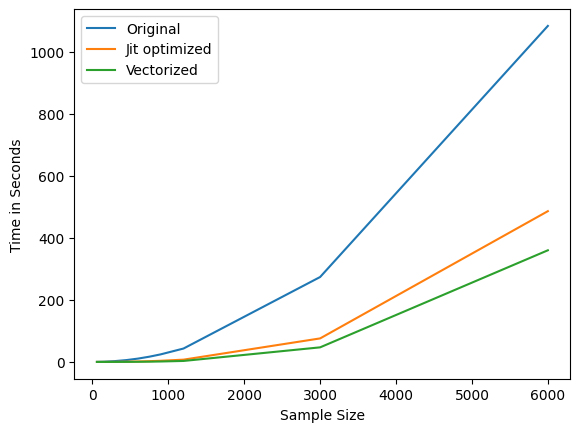

In [21]:
timing.columns=['Observations', 'Original', 'Jit optimized', 'Vectorized', 'None']
timing = timing.drop(['None'], axis=1)
t = timing.plot(x='Observations')
t.set_xlabel("Sample Size")
t.set_ylabel("Time in Seconds")

In [22]:
seed = [0,1,2,3,4]
train_size = [.001, .0025, .005, .0075, .01, .0125, .015, .02, .05, .1]
n = len(train_size)
timing = np.zeros((n,3))
for i in range(0,n):
    for j in seed:
        dgms_train, dgms_test = train_test_split_sklearn(mnist, 'labels', train_size = train_size[i], seed=j)
        xdgm0_train = np.array(dgms_train['zero_dim_rtl'])
        timing[i,0] += len(xdgm0_train)

        start = time.time()
        train, dummy_train, dummy = reshape_persistence_diagrams(xdgm0_train)
        X_train_features = optimized_kernel_features(train, dummy_train, s = .3)
        end = time.time()-start
        timing[i,1] +=end
        print("Finished Jit Optimized Kernel")

        # start = time.time()
        # train, dummy_train, dummy = reshape_persistence_diagrams(xdgm0_train)
        # result1 = parallel_optimized_kernel_features(train, dummy_train, .3)
        # end = time.time()-start
        # timing[i,3] +=end
        # print("Finished Jit Optimized and Parallel Kernel")

        start = time.time()
        train, dummy_train, dummy = reshape_persistence_diagrams(xdgm0_train)
        X_train_features_gu = guvectorize_kernel(train, dummy, .3)
        end = time.time()-start
        timing[i,2] +=end
        print("Finished gu vectorize")

        # start = time.time()
        # train, dummy_train, dummy = reshape_persistence_diagrams(xdgm0_train)
        # X_train_features_gu = parallel_gu_vectorize(train, dummy, .3)
        # end = time.time()-start
        # timing[i,4] +=end
        # print("Finished gu vectorize parallel")

    print("Finished Training ", i)
timing = pd.DataFrame(timing/5)
timing.columns=['Observations', 'Jit optimized', 'Vectorized']
print(timing)

Finished Jit Optimized Kernel
Finished gu vectorize
Finished Jit Optimized Kernel
Finished gu vectorize
Finished Jit Optimized Kernel
Finished gu vectorize
Finished Jit Optimized Kernel
Finished gu vectorize
Finished Jit Optimized Kernel
Finished gu vectorize
Finished Training  0
Finished Jit Optimized Kernel
Finished gu vectorize
Finished Jit Optimized Kernel
Finished gu vectorize
Finished Jit Optimized Kernel
Finished gu vectorize
Finished Jit Optimized Kernel
Finished gu vectorize
Finished Jit Optimized Kernel
Finished gu vectorize
Finished Training  1
Finished Jit Optimized Kernel
Finished gu vectorize
Finished Jit Optimized Kernel
Finished gu vectorize
Finished Jit Optimized Kernel
Finished gu vectorize
Finished Jit Optimized Kernel
Finished gu vectorize
Finished Jit Optimized Kernel
Finished gu vectorize
Finished Training  2
Finished Jit Optimized Kernel
Finished gu vectorize
Finished Jit Optimized Kernel
Finished gu vectorize
Finished Jit Optimized Kernel
Finished gu vectorize
F

Text(24.0, 0.5, 'Time in Seconds')

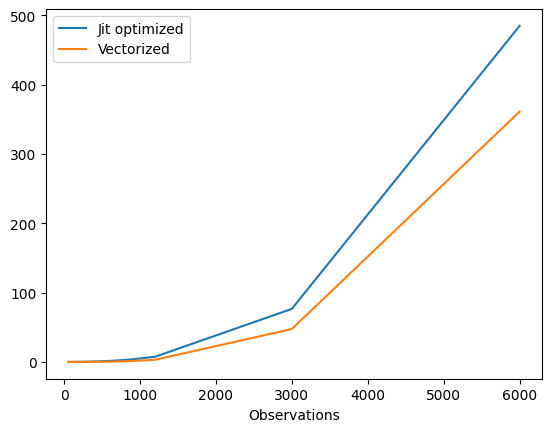

In [24]:
timing.plot(x='Observations')
t.set_xlabel("Sample Size")
t.set_ylabel("Time in Seconds")

Timing with simulated dataset

In [ ]:
train_test = xdgm0_train[0:200]
%timeit timing, X_train_features = kernel_features(np.array(train_test), s = .3)
%timeit timing, X_train_features = optimized_kernel_features(np.array(train_test), s = .3)
dummy_train = np.arange(len(train_test), dtype=np.float64)
train = reshape_persistence_diagrams(train_test)
%timeit numba_kernel_features_train(train, dummy_train, .3)

In [ ]:
train_test = xdgm0_train[0:300]
%timeit timing, X_train_features = kernel_features(np.array(train_test), s = .3)
%timeit timing, X_train_features = optimized_kernel_features(np.array(train_test), s = .3)
%timeit timing, X_train_features = parallel_optimized_kernel_features(np.array(train_test), s = .3)

In [ ]:
train_test = xdgm0_train[0:400]
%timeit timing, X_train_features = kernel_features(np.array(train_test), s = .3)
%timeit timing, X_train_features = optimized_kernel_features(np.array(train_test), s = .3)
%timeit timing, X_train_features = parallel_optimized_kernel_features(np.array(train_test), s = .3)

In [ ]:
train_test = xdgm0_train[0:500]
%timeit timing, X_train_features = kernel_features(np.array(train_test), s = .3)
%timeit timing, X_train_features = optimized_kernel_features(np.array(train_test), s = .3)
%timeit timing, X_train_features = parallel_optimized_kernel_features(np.array(train_test), s = .3)

In [ ]:
train_test = xdgm0_train[0:750]
%timeit timing, X_train_features = kernel_features(np.array(train_test), s = .3)
%timeit timing, X_train_features = optimized_kernel_features(np.array(train_test), s = .3)
%timeit timing, X_train_features = parallel_optimized_kernel_features(np.array(train_test), s = .3)

In [ ]:
train_test = xdgm0_train[0:1000]
%timeit timing, X_train_features = kernel_features(np.array(train_test), s = .3)
%timeit timing, X_train_features = optimized_kernel_features(np.array(train_test), s = .3)
%timeit timing, X_train_features = parallel_optimized_kernel_features(np.array(train_test), s = .3)

In [ ]:
train_test = xdgm0_train[0:1250]
%timeit timing, X_train_features = kernel_features(np.array(train_test), s = .3)
%timeit timing, X_train_features = optimized_kernel_features(np.array(train_test), s = .3)
%timeit timing, X_train_features = parallel_optimized_kernel_features(np.array(train_test), s = .3)

In [ ]:
train_test = xdgm0_train[0:1500]
%timeit timing, X_train_features = kernel_features(np.array(train_test), s = .3)
%timeit timing, X_train_features = optimized_kernel_features(np.array(train_test), s = .3)
%timeit timing, X_train_features = parallel_optimized_kernel_features(np.array(train_test), s = .3)

In [ ]:
train_test = xdgm0_train[0:2000]
%timeit timing, X_train_features = kernel_features(np.array(train_test), s = .3)
%timeit timing, X_train_features = optimized_kernel_features(np.array(train_test), s = .3)
%timeit timing, X_train_features = parallel_optimized_kernel_features(np.array(train_test), s = .3)